Penkit provides tools for making pseudo-3D projections of textures onto **surfaces**. A surface in penkit is a 2D matrix that is treated as an elevation map. These can either come from real-world data (e.g. topographic data), or be generated. Penkit's `surfaces` module provides a few surface generators to get you started.

In [91]:
%matplotlib inline
from penkit import surfaces
import matplotlib.pyplot as plt

Since surfaces are just matrices, we can use `matplotlib.imshow` to see what they look like.

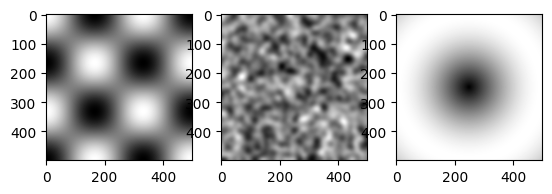

In [92]:
fig, (a1, a2, a3) = plt.subplots(1, 3)
a1.imshow(surfaces.make_bubble_surface(), cmap='gray')
a2.imshow(surfaces.make_noise_surface(), cmap='gray')
a3.imshow(surfaces.make_sine_surface(), cmap='gray');

With penkit, we can combine a surface, a texture, and an angle to produce a new layer through **projection**.

In [ ]:
from penkit.textures import make_grid_texture
from penkit.textures.util import rotate_texture
from penkit.surfaces import make_noise_surface
from penkit.projection import project_and_occlude_texture
from penkit.preview import show_layer

In [ ]:
# create a texture
grid_density = 40
texture = make_grid_texture(grid_density, grid_density, 100)

# rotate the texture
texture = rotate_texture(texture, 50)

# create the surface
surface = make_noise_surface(blur=30, seed=12345) * 5

# project the texture onto the surface
proj = project_and_occlude_texture(texture, surface, angle=45)

# plot the result
show_layer(proj)

All textures are layers, but not all layers are textures (remember, textures are a special case of layers that fit within `(0, 1)` on both axes.) We can use `penkit.textures.util.fit_texture` to convert any layer into a texture by scaling both axes. This allows us to, for example, use a generated fractal as a texture.

In [ ]:
from penkit.fractal import hilbert_curve
from penkit.textures.util import fit_texture

In [85]:
# create a texture
texture = hilbert_curve(iterations=7)
# rotate the texture
texture = rotate_texture(texture, 35)
texture = fit_texture(texture)
# create the surface    
surface = make_noise_surface(blur=30) * 15

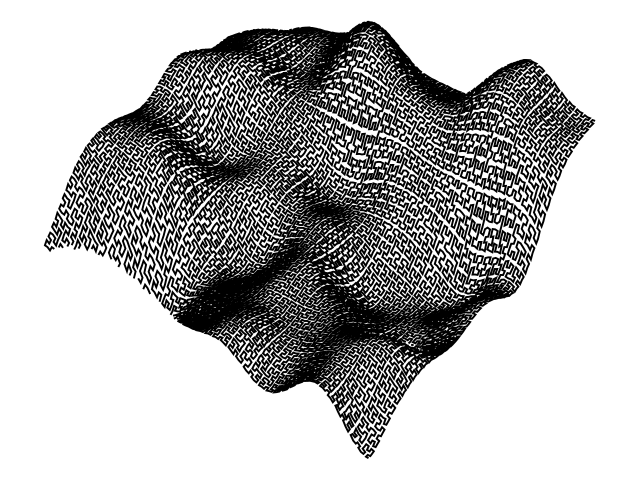

In [86]:
# project the texture onto the surface
proj = project_and_occlude_texture(texture, surface, 25)
# plot the result
show_layer(proj, height=480, width=640)

In [89]:
from penkit.write import write_plot

# Save the plot as SVG using penkit.write
write_plot([proj], "hilbert1.svg", width=11, height=8.5, unit="in")